In [ ]:
Pkg.update()

In [30]:
# Data 
start_x = 0           # start position of the vehicle
destination = 800     # position of destination
idle_fuel = 0.1/3600  # gallons per second consumed when vehicle stops with engine on
max_v = 19            # maximum speed limit on the route
min_a = -5            # minimum acceleration, limit of the vehicle, m/s^2
max_a = 5             # maximum acceleration, limit of the vehicle, m/s^2
T = 180               # maximum time to reach destination, in seconds
  
# traffic lights data 
n_lights = 3                         # number of lights on the route
traf_pos = [300, 400, 480]           # positions of the traffic lights 
t_green_duration = [15, 15, 15]      # how long light stays green for traffic light i 
t_red_duration = [20, 20, 24]  #how long light stays yellow + red for traffic light i, yellow is before red
start_color = [1, 1, 0]              # with which color light cycle starts for traffic light i, [red, green,red]

#=
 Values necessary for SOS2 constraint. 
 Piecewise Linear Function to map velocity to fuel consumed at that velocity
    
    y1 = 0.1*(-13/2*v[i]+59)
    y2 = 0.1*7
    y3 = 0.1*(3/4*v[i]-17/4)

=#
v_end_point = [8, 8, 15]
v_func = [0.7, 0.7, 0.7]
l = [-8, 7, 4]
l_abs = abs(l)
l_sign = [-1, 1, 1]
g = [-13/20, 0, 3/40];

In [31]:
# Values for each traffic light at each second that define how long it remains red or green 
t_g = Array{Int64, 2}(n_lights, T)     # number of seconds left until traffic light i turns green for each jth second  
t_r = Array{Int64, 2}(n_lights, T)     # number of seconds left until traffic light i turns red for each jth second

# start_color = 0 means red, start_color = 1 means green 
# k - index of the traffic light
# This function helps to assign the start color to the traffic light k.
function init_lights(start_color,k)
    if start_color==0  # if red 
        for i=1:T
            j = i%(t_red_duration[k] + t_green_duration[k]) # repetition cycle of red and green 
            if j<=(t_red_duration[k]-1)                     # first section of the cycle is red    
                t_g[k, i] = t_red_duration[k] - j           # number of second till green at ith second
                t_r[k, i] = 0                               # kth light is red, at ith second
            else
                t_g[k, i] = 0
                t_r[k, i] = t_green_duration[k] - j + t_red_duration[k]
            end
        end
    else             # if green 
        for i=1:T
            j = i%(t_red_duration[k] + t_green_duration[k])  # repetition cycle of red and green 
            if j<=(t_green_duration[k]-1)                    # first section of the cycle is green
                t_g[k, i] = 0                                # kth light is green, at ith second
                t_r[k, i] = t_green_duration[k] - j          # number of second till red at ith second
            else
                t_g[k, i] = t_red_duration[k] - j + t_green_duration[k]
                t_r[k, i] = 0
            end
        end
    end
end

# Set the start color and cycle of the traffic lights 
for i=1:n_lights
    init_lights(start_color[i], i)
end
init_lights(1, 1)
println(t_g)
println()
println(t_r)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0; 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0; 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 

11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15]


In [37]:
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag = 0))

########################################## Variables #########################################

@variable(m, x[1:T] >=0 )                 # position at time t
@variable(m, 0 <= v[1:T] <= max_v)        # velocity at time t
@variable(m, min_a <= a[1:T-1] <= max_a)  # acceleration at time t      
@variable(m, w[1:T-1])                    # epigraph variable for the abs val of difference in velocity
@variable(m, w_a[1:T-2])                  # epigraph variable for the abs val of difference in acceleration (jerk)

# Binary variables for logical constraints z[k,i], kth light and ith second

@variable(m, z_1[1:n_lights, 1:T], Bin)   # iff z_1=1 then x[i] >= traf_pos of light k
@variable(m, z_2[1:n_lights, 1:T], Bin)   # iff z_2=1 then x[i] <= traf_pos of light k
@variable(m, z_3[1:n_lights, 1:T], Bin)   # if z_1=1 and z_2=1 then z_3 = 1; i.e. x[i] == traf_pos of light k
@variable(m, z_4[1:n_lights, 1:T], Bin)   # if x[i]>= traf_pos[k]-max_v then z_4=1
@variable(m, z_5[1:n_lights, 1:T], Bin)   # if x[i]<= traf_pos[k] then z_5=1
@variable(m, z_6[1:n_lights, 1:T], Bin)   # if z_4=1 and z_5=1 then z_6=1

# Binary variables for the logical constraints on the position and velocity of vehicle
@variable(m, z_7[1:T], Bin)              # if v[i]<=0 then z_7 = 1
@variable(m, z_8[1:T], Bin)              # if x[i]<=destination then z_8 = 1
@variable(m, z_9[1:T], Bin)              # if x[i]<=destination (z_8=1) and v[i]<=0 (z_7=1) then z_9 = 1

# Variables for the SOS2 constraint
#@variable(m, z_p[1:T,1:3], Bin)
#@variable(m, lambda[1:T,1:3] >= 0)

########################################## Constraints #########################################

@constraint(m, dynamics[i in 1:T-1], x[i+1] == x[i] + a[i]/2 + v[i]) # x = at^2*0.5 + vt
@constraint(m, velocity_change[i in 1:T-1], v[i+1] == v[i] + a[i])   # v = v_initial + at 
@constraint(m, x[T] == destination)                                  # we need to reach destination 
@constraint(m, x[1] == start_x)                                      # we need to start at given pos
@constraint(m, v[1] == 0)                                            # start at rest 
@constraint(m, v[T] == 0)                                            # end at rest

# SOS2 constraints to ensure choosing two consecutive end points of segments in 
# piecewise linear function, v vs fuel 
#=
for i in 1:T
    @constraint(m, lambda[i,1] <= l_abs[1]*z_p[i,1])
    @constraint(m, lambda[i,2] <= l_abs[2]*(z_p[i,2] + z_p[i,1]))
    @constraint(m, lambda[i,3] <= l_abs[3]*(z_p[i,2] + z_p[i,3]))
    @constraint(m, sum(lambda[i,:]) <= sum(l_abs))
end

@expression(m, obj_t[i in 1:T], sum(z_p[i,j]*v_func[j] + l_sign[j]*g[j]*lambda[i,j] for j=1:3))
@expression(m, v_value[i in 1:T], sum(z_p[i,j]*v_end_point[j] + l_sign[j]*lambda[i,j] for j=1:3))

for i in 1:T                                    
    @constraint(m, v_value[i] == v[i])
end 
=#                                                                
for i=1:T-1
    # Epigraph constraint for abs value of acceleration 
    @constraint(m, w[i] >= a[i])
    @constraint(m, -w[i] <= a[i])
    
    # Epigraph constraint for abs value of difference in acceleration
    if i <= T-2
        @constraint(m, w_a[i] >= a[i+1]-a[i])
        @constraint(m, -w_a[i] <= a[i+1]-a[i])
    end
end

# Constraints to check whether vehicle should stop or move when it's close to the traffic light

for k = 1:n_lights
    for i=1:T
        
        # constraints for checking if x[i] == traf_pos[k] 
        
        @constraint(m, x[i]- traf_pos[k] <= destination*2*z_1[k, i] - (1-z_1[k, i])) 
        @constraint(m, x[i] - traf_pos[k] >= -traf_pos[k]*(1-z_1[k, i]))
        @constraint(m, x[i]- traf_pos[k] >= -traf_pos[k]*z_2[k, i] + (1-z_2[k, i]))
        @constraint(m, x[i]- traf_pos[k] <= destination*2*(1-z_2[k, i])) 
        @constraint(m, z_1[k, i] + z_2[k, i] - 2 <= 2*z_3[k, i] - (1-z_3[k, i]))
        @constraint(m, z_1[k, i] + z_2[k, i] - 2 >= -2*(1-z_3[k, i]))
                                
        # constraints for x[i] being close to traf_pos[k]
        
        @constraint(m, x[i] - (traf_pos[k]-max_v) <= destination*2*z_4[k, i] - 0.1*(1-z_4[k, i]))
        @constraint(m, x[i] - (traf_pos[k]-max_v) >= -(traf_pos[k]-max_v)*(1-z_4[k, i]))
        @constraint(m, x[i] - (traf_pos[k]) >= -(traf_pos[k])*z_5[k, i] + 0.1(1-z_5[k, i]))
        @constraint(m, x[i] - (traf_pos[k]) <= destination*2*(1-z_5[k, i]))
        @constraint(m, z_4[k, i] + z_5[k, i] - 2 <= 2*z_6[k, i] - (1-z_6[k, i]))
        @constraint(m, z_4[k, i] + z_5[k, i] - 2 >= -2*(1-z_6[k, i]))
        
        # enters this loop if light is red, t_g is positive 
    
        for j=i:i+t_g[k, i]
            if j<=T
                # if z_6=1 then x[i+1] ... x[i+t_g[i]] <= traf_pos[k] 
                # if it is red color, and you are close to the traf_pos[k], don't cross red light until green  
                @constraint(m, x[j]-(traf_pos[k]) <= 2*(destination)*(1-z_6[k, i])) 
                # if z_3=1 then v[j] = 0, last speed =0 when stops
                # if it is red and you are exactly at traf_pos[k], stop immediately 
                @constraint(m, v[j] <= max_v*(1-z_3[k, i]))                
            end
        end
        
    end
end

for i=1:T
                            
    # z_7[i] = 1, if v[i]=0, ignore first and last as they are defined to be 0
    if i>=2 && i <= T-1
        @constraint(m, v[i] >= -0.1*z_7[i]+(1-z_7[i]))
        @constraint(m, v[i] <= max_v*(1-z_7[i]))
    end
                            
    # this constraint is necessary to check whether x[i] is less than destination   
    
    @constraint(m, x[i] - (destination-0.01) >= -(destination-0.01)*z_8[i] + 0.01(1-z_8[i])) 
    @constraint(m, x[i] - (destination-0.01) <= destination*2*(1-z_8[i]))  # if z_8=1 then x<= dest-0.01
    
    # if x[i] >= destination, means our velocity is 0, then do not count fuel after that point  
    # else use the piecewise linear function defined for velocity vs fuel
    #=
    @constraint(m, sum(z_p[i,:]) <= z_8[i])         # if z_8==0 then sum(z_p)<=0
    @constraint(m, sum(z_p[i,:]) >= z_8[i])         # if z_8==0 then sum(z_p)>=0
    @constraint(m, sum(z_p[i,:])-1 >= -1(1-z_8[i])) # if z_8==1 then sum(z_p)>=1
    @constraint(m, sum(z_p[i,:])-1 <= -1(1-z_8[i])) # if z_8==1 then sum(z_p)<=1   
    =#                        
    # count the number of times speed is 0 only when x[i]<destination to count idling time 
    @constraint(m, z_7[i] + z_8[i] - 2 <= 2*z_9[i] - (1-z_9[i]))  
    @constraint(m, z_7[i] + z_8[i] - 2 >= -2*(1-z_9[i]))
end

In [47]:
########################################## Objective Function #########################################
                        
# 1) minimize fuel only until destination 
# 2) minimize absolute change in velocities at each second
# 3) minimize absolute change in acceleration at each second
# 4) minimize fuel spent while idling (waiting at the red light)
#@objective(m, Min, sum(obj_t) + sum(w) + sum(w_a) + sum(z_9)*idle_fuel)
@objective(m, Min, sum(w))
solve(m)
            
vopt = getvalue(v)
xopt = getvalue(x)
aopt = getvalue(a)

println("Objective value = ", getobjectivevalue(m))

Objective value = 13.599999999999813


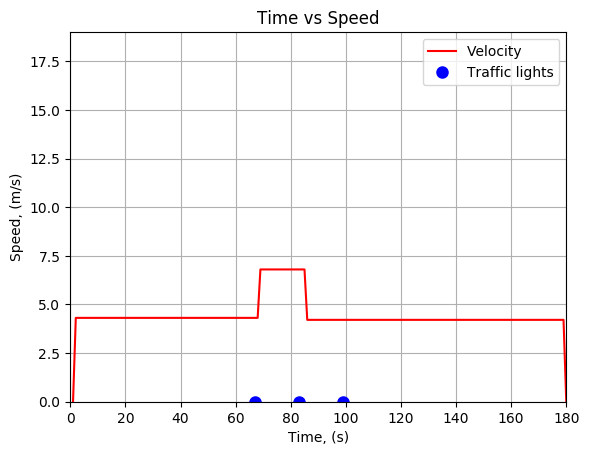

In [48]:
# Plot of the Time vs Speed, Blue dots indicate the time when vehicle is near traffic light  
using PyPlot
t = [1:T;]
grid("on")
ylim(0,max_v)
xlim(0,T)
plot(t, vopt, label="Velocity", "r")

time_at_light = zeros(n_lights)
for j = 1:n_lights
    for i=1:T
        if traf_pos[j]-max_v <= xopt[i] <= traf_pos[j] + max_v
            time_at_light[j] = i
            break
        end
    end
end
plot(time_at_light, zeros(n_lights), "bo", markersize=8, label="Traffic lights")
xlabel("Time, (s)")
ylabel("Speed, (m/s)")
title("Time vs Speed")
legend();

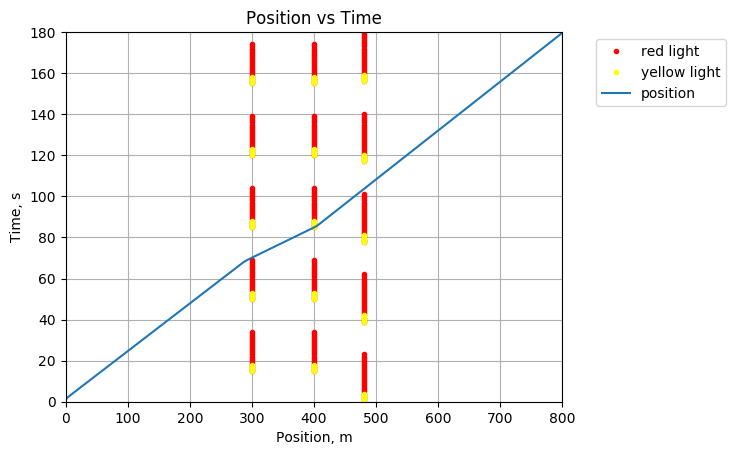

In [49]:
xlim(0,destination+100)

t_lights = zeros(n_lights, T)
t_yellow = zeros(n_lights, T)

for k=1:n_lights
    count = 0
    for i=1:T
        if t_r[k,i]==0
            if count < 4
                t_yellow[k,i] = i
            end
            count = count + 1
            t_lights[k,i] = i
        else # green 
            count = 0
        end
    end
end

traf_pos_x = zeros(n_lights, T)
for k=1:n_lights
    for i in 1:T
        traf_pos_x[k,i] = traf_pos[k]
    end
end
ctr1 = 0
ctr2 = 0
for k=1:n_lights
    for i=1:T
        if t_lights[k,i]>0
            if ctr1 == 0
                plot(traf_pos_x[k,i], t_lights[k,i], "ro",  markersize=3, label="red light")
            else
                plot(traf_pos_x[k,i], t_lights[k,i], "ro",  markersize=3)
            end
            ctr1 = ctr1 + 1
        end
    end
    for i=1:T
        if t_yellow[k,i]>0
            if ctr2 == 0
                plot(traf_pos_x[k,i], t_yellow[k,i], color="yellow", marker="o", markersize=3, linestyle="None", 
                    label="yellow light")
            else
                plot(traf_pos_x[k,i], t_yellow[k,i], color="yellow", marker="o",  markersize=3, linestyle="None") 
            end
            ctr2 = ctr2 + 1
        end
    end
end
plot(xopt,t, label = "position")
ylim(0, T)
xlim(0, destination)
grid("on")
xlabel("Position, m")
ylabel("Time, s")
title("Position vs Time")
legend(loc=9, bbox_to_anchor=(1.2, 1));